---
# <div align="center"><font color='blue'>  </font></div>
# <div align="center"><font color='blue'> COSC 2779 | Deep Learning  </font></div>
## <div align="center"> <font color='blue'> Week 1 Lecture: **Machine Learninig Basics**</font></div>
---

**Disclaimer:** The code is done quickly to demonstrate some important concepts in "Evaluating a hypotheses" and, should not be considered as an adequate approach to solve the tasks mentioned.

In this example we will look into classifying images of hand writtend digits. An example from the dataset we are working with is given below:  
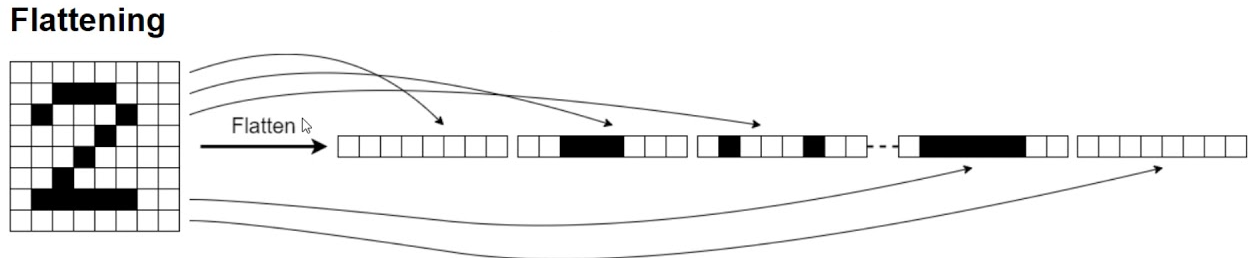


The digits dataset consists of 8x8 pixel images of digits. 
The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).

sklearn has already done this for us and a subset of MNIST data is available in sklearn datasets.

The task we are interested in is: Given the pixel intensities (64 dimensional attribute vector) predict what digit(0 to 9) the image represent.

Lets first read the data

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Lets visualise some data. As data are images 

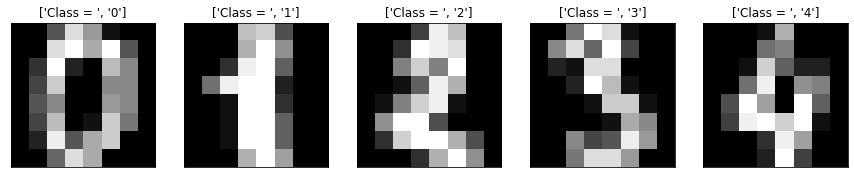

In [2]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.gray() 
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i]) 
    plt.xticks([])
    plt.yticks([])
    plt.title(['Class = ', str(digits.target[i])])
plt.show() 

Lets put the data to a dataframe. This is optional - we can directly work with the data from the sklearn dataset if needed. 

In [3]:
data = pd.DataFrame(data=digits.data, columns=["pixel_"+ str(i+1) for i in range(0,64)] )
data['class'] = digits.target
data.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,pixel_64,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Lets now examine the target.

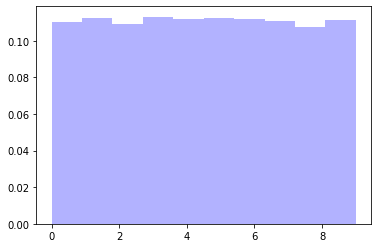

In [4]:
plt.hist(data['class'] ,alpha=0.3, color='b', density=True)
plt.show()

**What do you observe?**

In [ ]:
# data_0 = data[data['class'] == 0]
# data_8 = data[data['class'] == 8]
# print(data_0.shape, data_8.shape)

# data = data_0.append(data_8, ignore_index=True)
# data['class'] = data['class'] == 8
# print(data_0.shape, data_8.shape, data.shape)

Lets do some visualisation of the pixel intensities according to the class

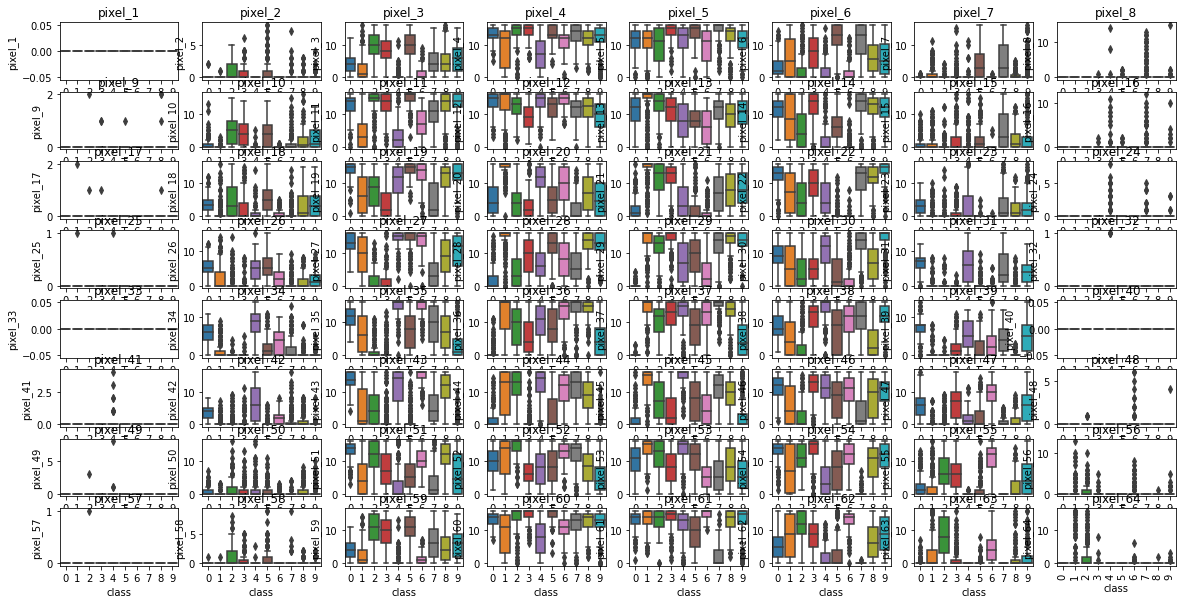

In [5]:
import seaborn as sns
plt.figure(figsize=(20,10))
i=1
for col in data.columns:
  
  if col != 'class':
    plt.subplot(8,8,i)
    sns.boxplot(x='class',y=col,data=data)
    i = i+1
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

**What do you observe?**

## Setting up the performance (evaluation) metric

Based on the above observations and the description of the task, what do you think is a **good performance measure for this task?**

There are many performance metrics that apply to this problem such as `accuracy_score`, `f1_score`, etc. More information on performance metrics available in sklearn can be found at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

However as the most **intuitive** out of these `accuracy_score` can be applied to this problem lets stick with it (if the classes are not balanced, then we have to go for another metric). 

What is the **target value**: In literature we can see that other people have achieved around **99% accuracy** in similar tasks. Therefore lets set out goal at that.


Next **what data should we use to evaluate the performance?**


We can generate "simulated" unseen data in several methods
1. Hold-Out validation
2. Cross-Validation


Lets look at how this is done


## Hold-out Validation

In hold out validation we divide the data into 3 subsets:
1. Training: to obtaining the parameters or the weights of the hypothesis
2. Validation: for tuning hyper-parameters and model selection.
3. To evaluate the performance of the developed model. DO NOT use this split to set or tune ant element of the model.

For this example lets divide the data into 60/20/20

In [6]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data_, test_size=0.25, shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

1077 360 360


In [7]:
train_X = train_data.drop(['class',], axis=1).to_numpy()
train_y = train_data[['class']].to_numpy()

test_X = test_data.drop(['class',], axis=1).to_numpy()
test_y = test_data[['class']].to_numpy()

val_X = val_data.drop(['class',], axis=1).to_numpy()
val_y = val_data[['class']].to_numpy()

We know the values for the features are between 0-16 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Lets scale them to 0-1 range

In [8]:
train_X = train_X/16.0
test_X = test_X/16.0
val_X = val_X/16.0

setup a function to print train/val accuracy score

In [9]:
from sklearn.metrics import accuracy_score

def print_accuracy_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = accuracy_score(train_y, train_pred)
    val_acc = accuracy_score(val_y, val_pred)
    
    print("Train Accuracy score: {:.3f}".format(train_acc))
    print("Validation Accuracy score: {:.3f}".format(val_acc))

## Baseline model

We need to select a baseline mode to do this task. I am going to select linear logistic regression for this example.

*There are better models than this, however we only know of one model we can use for this problem at the moment, therefore out choices are limited and the decision is simple.*

If we had other options, we need to use our knowledge on those techniques and  the EDA to select the best base model. 

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())

print_accuracy_scores(clf, train_X, train_y, val_X, val_y)

Train Accuracy score: 0.976
Validation Accuracy score: 0.950


For this task the baseline model achieved good performance. However we can see a gap between the Train Accuracy and the Validation Accuracy (generalisation GAP). 

**What can we do when there is a GAP between Train and Validation performance?**

- We can apply regularisation. The process is important. we start with a base model and then improve it based on our observations.

### Apply regularisation

When applying regularisation we need to select the lambda value. For this we can use
1. Grid search
2. Random search


We will do grid search in this example.

In [11]:
lambda_paras = np.logspace(-5, 1, num=100)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())
    
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = accuracy_score(train_y, train_pred)
    val_acc = accuracy_score(val_y, val_pred)
    
    train_performace.append(train_acc)
    valid_performace.append(val_acc)

Lets plot the results. When plotting I have made some changes to the values to get an image that looks like the one that is in the lecture slides. This is optional, you can plot the original numbers. 

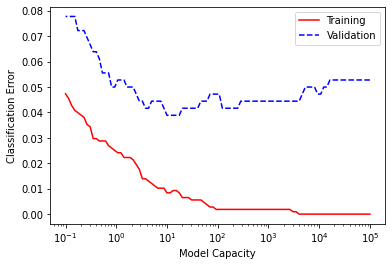

In [12]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], [1.0 - tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], [1.0 - vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

**What lambda value would you use? why?**

In [13]:
clf = LogisticRegression(penalty='l2', C = 10.0, random_state=0, solver='liblinear', max_iter=1000).fit(train_X, train_y.ravel())
print_accuracy_scores(clf, train_X, train_y, val_X, val_y)

Train Accuracy score: 0.992
Validation Accuracy score: 0.961


Is there still a GAP between training and validation. Why is this?

Lets try to see what features are important to the classifier we have selected. Instead of using bar graphs as last week. lets present the feature importance as an image. This shows that you need to do output visualisations according to the problem. 

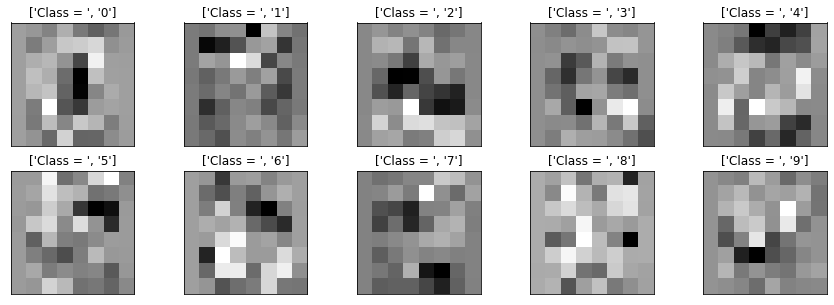

In [14]:
plt.figure(figsize=(15,5))
plt.gray() 
for i in range(10):
    plt.subplot(2,5,i+1)
    coef = clf.coef_[i]
    coef = coef.reshape((8,8))
    plt.imshow(coef) 
    plt.xticks([])
    plt.yticks([])
    plt.title(['Class = ', str(digits.target[i])])
plt.show() 

In [ ]:
# # for 0 class vs 8
# plt.figure(figsize=(15,5))
# plt.gray() 
# for i in range(1):
#     plt.subplot(2,5,i+1)
#     coef = clf.coef_[i]
#     coef = coef.reshape((8,8))
#     plt.imshow(coef) 
#     plt.xticks([])
#     plt.yticks([])
#     plt.title(['Class = ', str(digits.target[i])])
# plt.show() 

## Other Performance Metrics

We can also use other performance metrics to evaluate out model at this stage

classification report is a very useful tool.

In [15]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.94      0.92        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.92      0.92      0.92        39
           9       1.00      0.93      0.96        41

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.97       360
weighted avg       0.96      0.96      0.96       360



Another useful tool is the confusion matrix plots

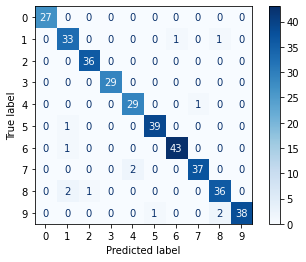

In [16]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,10)],
                                 cmap=plt.cm.Blues)
plt.show()

## Cross-validation


Cross-validation (CV) is the second technique we can use to generate simulated unseen data. Lets see how this is done.

Again we need to separate some test data - for final evaluation.

In [17]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
print(train_data.shape[0], test_data.shape[0])

1437 360


In [18]:
train_X = train_data.drop(['class',], axis=1).to_numpy()
train_y = train_data[['class']].to_numpy()

test_X = test_data.drop(['class',], axis=1).to_numpy()
test_y = test_data[['class']].to_numpy()

Now lets see how CV is done for a given lambda value. The advantage would be that the CV performance metric value would be using the entire training set (not just some portion of it).  

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
score_hold_val = list()
score_hold_train = list()
for train_idx, val_idx in kf.split(train_X):
    train_x_split = train_X[train_idx,:]
    train_y_split = train_y[train_idx,:]
    val_x_split = train_X[val_idx,:]
    val_y_split = train_y[val_idx,:]
    
    clf = LogisticRegression(penalty='l2', C = 10, random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_x_split, train_y_split.ravel())
    
    train_pred = clf.predict(train_x_split)
    val_pred = clf.predict(val_x_split)
    
    train_acc = accuracy_score(train_y_split, train_pred)
    val_acc = accuracy_score(val_y_split, val_pred)
    
    score_hold_train.append(train_acc)
    score_hold_val.append(val_acc)
    
print('Cross validation Accuracy: ' + str(np.mean(score_hold_val)))

Cross validation Accuracy: 0.9512921022067363


Now to tune the hyper parameter lambda, we need to run the above code for several lambdas and get the best value (Grid search). 

Running the above is not very convenient. SK-learn has made this easy for us by including a function to do CV. More information on CV with sklearn can be found at: https://scikit-learn.org/stable/modules/cross_validation.html

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

accuracy_scorer = make_scorer(accuracy_score)
lambda_paras = np.logspace(-5, 4, num=10)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l1', C = 1.0/lambda_para, solver='liblinear', max_iter=1000)
    scores = cross_validate(clf, train_X, train_y.ravel(), scoring=accuracy_scorer, return_estimator=True,return_train_score=True, cv=10)
    
    cv_results[lambda_para] = scores

Lets plot the results

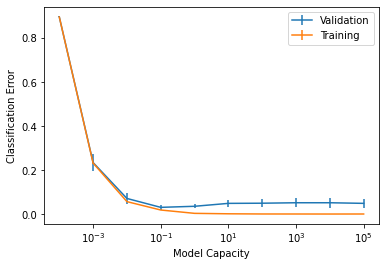

In [21]:
fig, ax = plt.subplots()

val_means = [1 - np.mean(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]
val_std = [np.std(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]

train_means = [1 - np.mean(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]
train_std = [np.std(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

Now that we know the lambda value, how can we get the model?

One way to do this is to pick the classifier that is closest to the mean performance from the best lambda value. 

In [22]:
best_lambda = 0.1    # best lambda according to the above figure

# get the split that has the closest performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1]['test_score'] - np.mean(cv_results[0.1]['test_score'])))

clf = cv_results[0.1]['estimator'][best_classifier_inx]

Lets plot the test accuracy

In [23]:
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,10)]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.89      0.89        35
           2       0.97      0.89      0.93        36
           3       0.88      1.00      0.94        29
           4       0.94      1.00      0.97        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.87      0.89        39
           9       0.95      0.93      0.94        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

